In [88]:
## import some basic libraries\
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [90]:
# Divide the dataset into independent and dependent features
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [91]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [92]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [93]:
## Feature Engineering
pd.get_dummies(X['Geography'],drop_first=True)

,Germany,Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True
...,...,...
9995,False,False
9996,False,False
9997,False,False
9998,True,False


In [94]:
geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [95]:
## concatinate these variables with database
X = X.drop(['Geography','Gender'],axis=1)

In [96]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [97]:
X = pd.concat([X,geography,gender],axis=1)

In [98]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [99]:
#Splitting the dataset into training and testing
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [100]:
# Feature scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [101]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [102]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [103]:
X_train.shape

(8000, 11)

**Part 2 : Now lets Create the ANN**

In [104]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [105]:
# lets initialize the ANN
classifier = Sequential()

In [106]:
# Adding the Input Layer
classifier.add(Dense(units=11,activation='relu'))

In [107]:
# Adding the first Hidden Layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))

In [108]:
# Adding the second hiddien Layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))

In [109]:
# Adding Output Layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [110]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [111]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [112]:
# Early Stopping
import tensorflow as tf

early_stoping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [113]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50,callbacks=early_stoping)

Epoch 1/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7826 - loss: 0.5050 - val_accuracy: 0.8103 - val_loss: 0.4376
Epoch 2/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8303 - loss: 0.4053 - val_accuracy: 0.8330 - val_loss: 0.3863
Epoch 3/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8485 - loss: 0.3828 - val_accuracy: 0.8448 - val_loss: 0.3864
Epoch 4/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8268 - loss: 0.3767 - val_accuracy: 0.8542 - val_loss: 0.3700
Epoch 5/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8393 - loss: 0.3864 - val_accuracy: 0.8474 - val_loss: 0.3818
Epoch 6/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8479 - loss: 0.3757 - val_accuracy: 0.8516 - val_loss: 0.3674
Epoch 7/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8366 - loss: 0.3783 - val_accuracy: 0.8504 - val_loss: 0.3757
Epoch 8/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8408 - loss: 0.3803 - val_accuracy: 0.

In [123]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

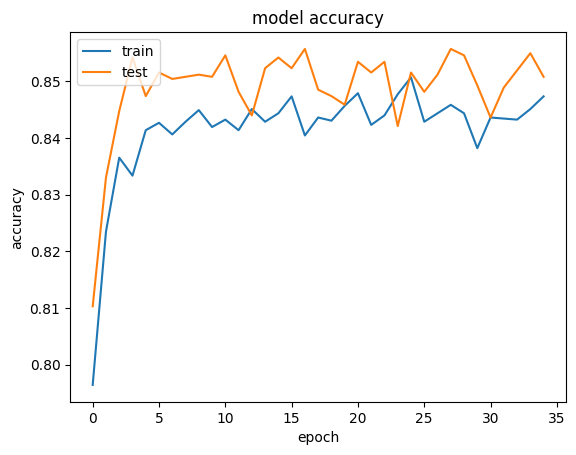

In [124]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


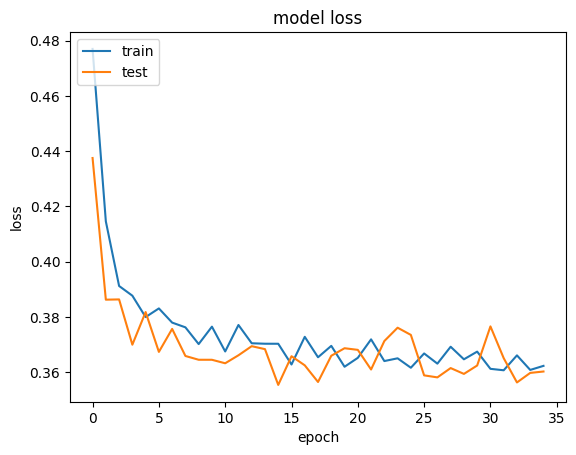

In [125]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Part 3: Making the prediction and evaluationg the model**

In [126]:
# predicting the Test set results
y_pred = classifier.predict_step(X_test)
y_pred = (y_pred >= 0.5)

In [130]:
# amke the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [131]:
cm

array([[1569,   26],
       [ 242,  163]])

In [132]:
# calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)

In [133]:
score

0.866

In [135]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1595
           1       0.86      0.40      0.55       405

    accuracy                           0.87      2000
   macro avg       0.86      0.69      0.74      2000
weighted avg       0.87      0.87      0.85      2000



In [136]:
# get the weights
classifier.get_weights()

[array([[-8.01237345e-01,  1.37286782e-01, -2.35081926e-01,
         -8.91474009e-01, -1.31373480e-03, -3.65427323e-03,
          1.70247033e-01,  6.73375845e-01,  1.11687221e-01,
         -1.07609801e-01,  1.36737466e-01],
        [ 1.52404845e-01, -1.05695441e-01,  3.30795789e+00,
         -8.56220245e-01, -1.05465930e-02,  8.77709866e-01,
          3.93005699e-01, -1.63711822e+00, -1.26622009e+00,
          2.50537515e+00, -1.80288053e+00],
        [ 3.35917532e-01,  8.57014120e-01,  4.17967737e-02,
         -4.79925834e-02, -2.93423627e-02, -1.09742656e-01,
          6.23061776e-01, -3.66154552e-01,  8.86475295e-03,
          5.69393188e-02,  5.60069680e-01],
        [ 2.71911204e-01,  3.36228125e-02, -8.75794470e-01,
         -4.25050795e-01, -2.29038501e+00,  7.58371830e-01,
         -2.55866122e+00, -7.48021960e-01, -1.53186405e+00,
         -3.17066252e-01, -2.00435495e+00],
        [ 8.95439446e-01, -6.52251303e-01, -2.12932587e+00,
          2.67902594e-02,  1.12971771e+00,  

In [138]:
classifier.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 7)              │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 6)              │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 815 (3.19 KB)

 Trainable params: 271 (1.06 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 544 (2.13 KB)

In [142]:
classifier.save('Churn_Modelling.h5')